In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Load the Dataset
df = pd.read_csv('Tesla_Stock_Data(2000-2025).csv')

df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   3694 non-null   object
 1   Close   3693 non-null   object
 2   High    3693 non-null   object
 3   Low     3693 non-null   object
 4   Open    3693 non-null   object
 5   Volume  3693 non-null   object
dtypes: object(6)
memory usage: 173.3+ KB


# Data Cleaning

In [5]:
df.isnull().sum()

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [12]:
#Convert close, high, low, open Datatype from object to float64
cols = ['Close', 'High', 'Low', 'Open']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
#Convert Volume Datatype from object to int
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce').fillna(0).astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3693 entries, 0 to 3693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3693 non-null   object 
 1   Close   3692 non-null   float64
 2   High    3692 non-null   float64
 3   Low     3692 non-null   float64
 4   Open    3692 non-null   float64
 5   Volume  3693 non-null   int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 187.5+ KB


In [14]:
df.duplicated().sum()

0

In [16]:
df.describe()

,Close,High,Low,Open,Volume
count,3692.000000,3692.000000,3692.000000,3692.000000,3.693000e+03
mean,84.684063,86.583019,82.720395,84.724803,9.645360e+07
std,111.289879,113.897252,108.647448,111.413059,7.736751e+07
min,1.053333,1.108667,0.998667,1.076000,0.000000e+00
25%,12.226501,12.447833,12.011500,12.238833,4.935750e+07
50%,18.326334,18.641334,17.938334,18.325000,8.192850e+07
75%,182.869999,186.305000,178.772499,182.982506,1.216350e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


# Exploratory Data Analysis(EDA)

# 1. Statistics

In [20]:
#1. Calculate the Mean, Median, Mode, Variance and Standard Deviation of the column 'High'.

#Mean
mean_value = df['High'].mean()
print(f"Mean: {mean_value}")

#Median
median_value = df['High'].median()
print(f"Median: {median_value}")

#Mode
mode_value = df['High'].mode().values
print(f"Mode: {mode_value}")

#Variance
var_value = df['High'].var()
print(f"Variance: {var_value}")

#Standard Deviation
std_value = df['High'].std()
print(f"Standard Deviation: {std_value}")

Mean: 86.58301891249283
Median: 18.641333580017093
Mode: [1.86666703 2.         2.29999995]
Variance: 12972.584103487767
Standard Deviation: 113.8972523965691


# 2. Probability

In [23]:
#1. What is the probability that a closing price is higher than its opening price.
prob_close_higher = (df['Close'] > df['Open']).mean()
print(f"P(Close > Open): {prob_close_higher:.4f}")

P(Close > Open): 0.4950


In [26]:
#2. Find the probability of the daily trading volume which is exceeded 100 million shares.
prob_high_volume = (df['Volume'] > 100000000).mean()
print(f"P(Volume > 100M) = {prob_high_volume:.4f}")

P(Volume > 100M) = 0.3731


In [27]:
#3. What is the probability of the stock closed at its highest price of the day.
prob_stock_highest_price = (df['Close'] == df['High']).mean()
print(f"P(Close == High): {prob_stock_highest_price:.4f}")

P(Close == High): 0.0035


# 3. Linear Algebra

In [30]:
#1. Find the covariance matrix of the Open, Close, High, and Low stock prices.
cov_matrix = df[['Open', 'Close', 'High', 'Low']].cov()
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
                Open         Close          High           Low
Open   12412.869669  12389.405896  12686.096974  12100.192507
Close  12389.405896  12385.437247  12671.089493  12087.614244
High   12686.096974  12671.089493  12972.584103  12370.165880
Low    12100.192507  12087.614244  12370.165880  11804.268064


In [32]:
#2. Find the eigenvalues and eigenvectors of the covariance matrix displayed above.
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"Eigenvalues:\n",eigenvalues)
print(f"Eigenvectors:\n",eigenvectors)

Eigenvalues:
 [4.95598729e+04 9.88636692e+00 1.06881979e+00 4.33098013e+00]
Eigenvectors:
 [[ 0.50035942 -0.69399904 -0.50754316  0.10200838]
 [ 0.49980375  0.70149973 -0.4919588  -0.12677094]
 [ 0.51157415 -0.11525214  0.52760505 -0.66831261]
 [ 0.48798417  0.11393153  0.47117871  0.72586616]]


# 4. NumPy Array

In [35]:
#1. Normalize the Close prices using Min-Max scaling with NumPy Arrays.
close_min = df['Close'].min()
close_max = df['Close'].max()
df['Close_Normalized'] = (df['Close'] - close_min) / (close_max - close_min)
print("First 5 Normalized Close Prices:\n", df['Close_Normalized'].head())

First 5 Normalized Close Prices:
 0         NaN
2    0.001126
3    0.001118
4    0.000858
5    0.000473
Name: Close_Normalized, dtype: float64


# 5. Pandas Series

In [37]:
#1. Find the correlation between the Close price and Volume using Pandas Series.
correlation = df['Close'].corr(df['Volume'])
print(f"Correlation between Close and Volume: {correlation:.4f}")

Correlation between Close and Volume: 0.0838


# Data Visualization

In [41]:
df.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'Close_Normalized'], dtype='object')

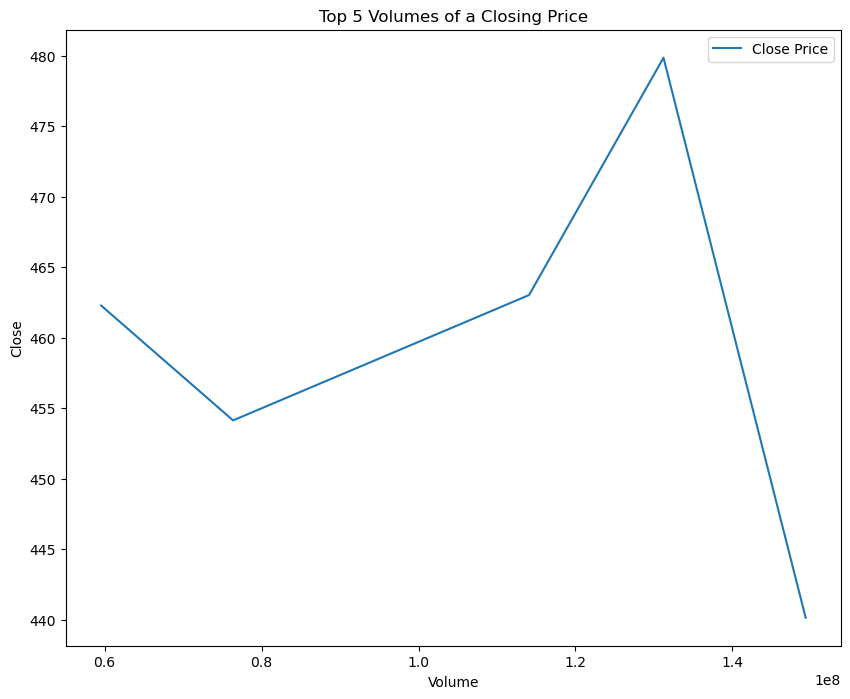

In [62]:
#1. Find the Top 5 Volume based on a Closing Price.
top_5 = df.nlargest(5, 'Close')[['Volume', 'Close']]
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Volume' , y = 'Close' , label = 'Close Price' , data = top_5)
plt.title('Top 5 Volumes of a Closing Price')
plt.legend()
plt.show()

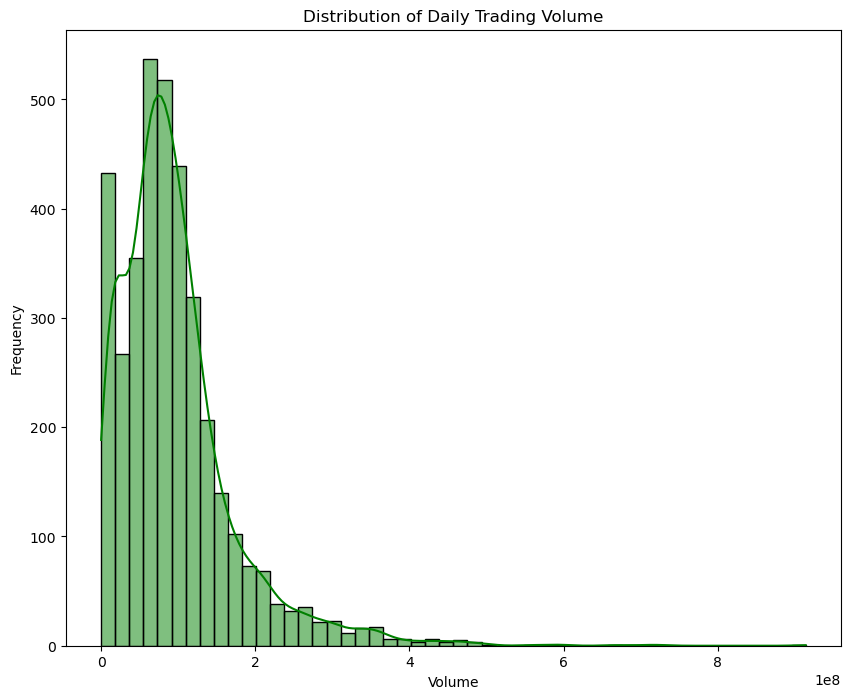

In [63]:
#2. Find distribution of Tesla's daily trading volume? 
plt.figure(figsize = (10,8))
sns.histplot(df['Volume'] , bins = 50 , kde = True , color = 'green')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Trading Volume')
plt.show()

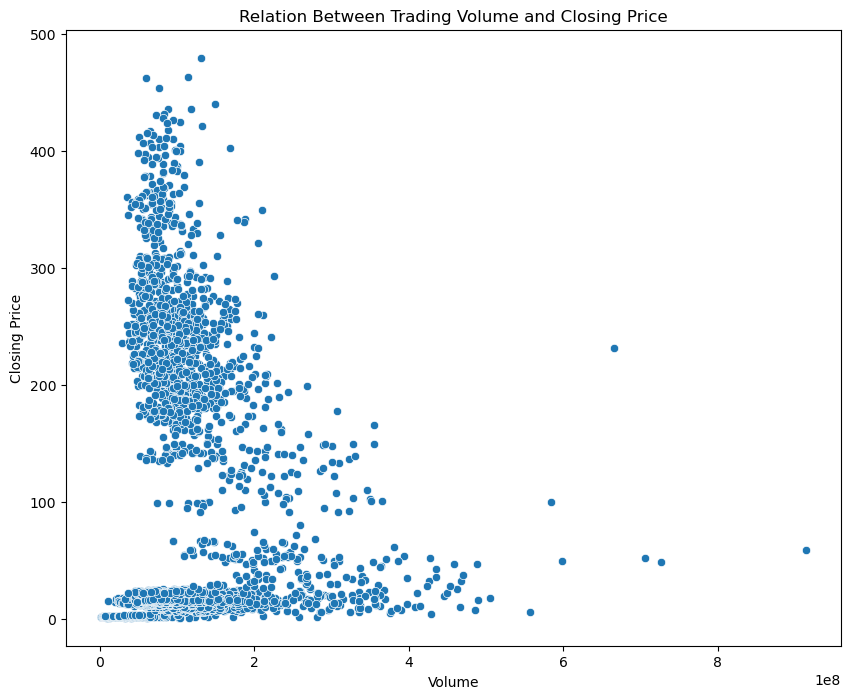

In [64]:
#3. Find a relation between trading volume and closing price.
plt.figure(figsize = (10,8))
sns.scatterplot(x = df['Volume'] , y = df['Close'] , data = df)
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Relation Between Trading Volume and Closing Price')
plt.show()

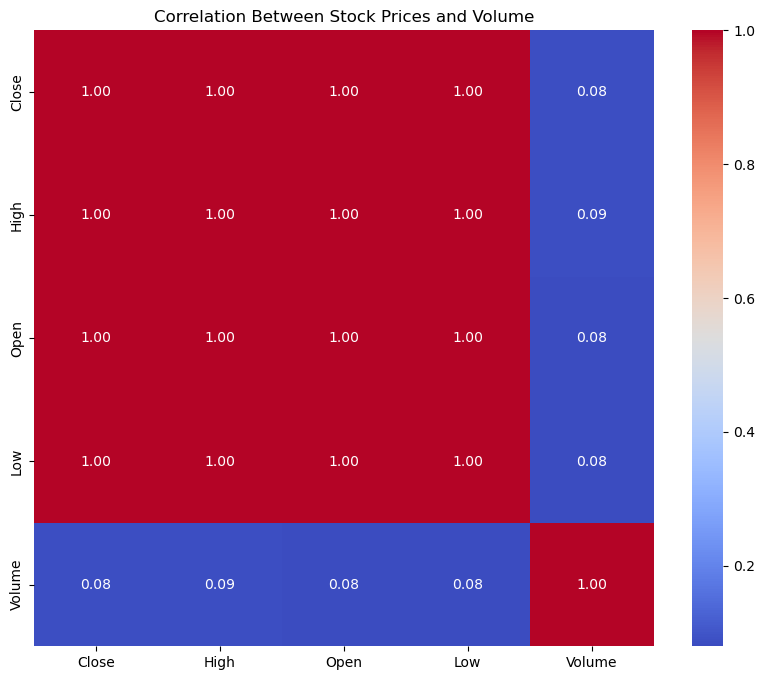

In [65]:
#4. Find the correlations between stock prices and volume.
plt.figure(figsize = (10,8))
sns.heatmap(df[['Close' , 'High' , 'Open' , 'Low' , 'Volume']].corr(), annot = True, cmap = 'coolwarm' , fmt = '.2f')
plt.title('Correlation Between Stock Prices and Volume')
plt.show()

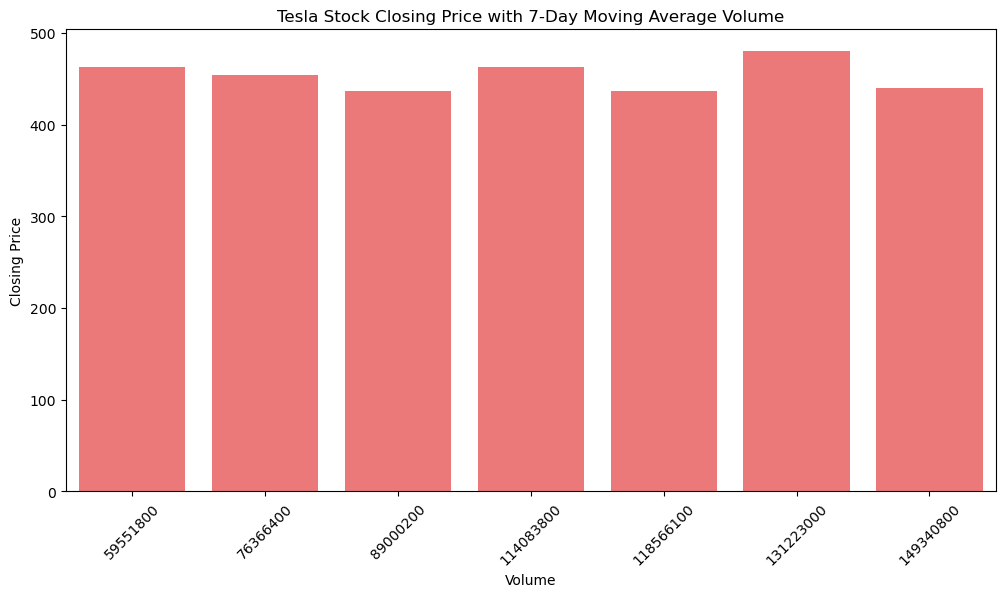

In [66]:
#5. Find the 7-day moving average volume compare to Tesla's daily closing price.
top_7 = df.nlargest(7, 'Close')[['Volume', 'Close']]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_7['Volume'], y=top_7['Close'], color='red', alpha=0.6)
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Closing Price with 7-Day Moving Average Volume')
plt.xticks(rotation=45)
plt.show()

# Conclusion

#Tesla's highest closing price is occurred at 131.2M volume, while other high closing prices had volumes between 59.5M and 149.3M, which is lesser than 131.2M volume.

Thank You!